# Cluster Analysis of Obesity Levels

The goal of this project is to use various unsupervised learning approaches to perform cluster analysis on participant responses to group the responses into varying obesity levels.

## Data

Estimation of Obesity Levels Based On Eating Habits and Physical Condition [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

The data used for this project is obtained from the UCI Machine Learning Repository. The data contains participant responses to various questions about their lifestyle and their obesity level.

## Exploratory Data Analysis (EDA)

The data for this project is provided as a CSV file.

In [119]:
import pandas as pd

data = pd.read_csv('obesity.csv')
print(data.shape)

(2111, 17)


The dataset contains 2111 samples and 17 features.

In [120]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [121]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

### Features

Features that are demographic information about participants:
- Gender
- Age
- Height
- Weight

Features that are participant responses to survey questions:
- family_history_with_overweight - Has a family member suffered or suffers from being overweight?
- FAVC - Do you eat high caloric food frequently?
- FCVC - Do you usually eat vegetables in your meals?
- NCP - How many main meals do you have daily?
- CAEC - Do you eat any food between meals?
- SMOKE - Do you smoke?
- CH2O - How much water do you drink daily?
- SCC - Do you monitor the calories you eat daily?
- FAF - How often do you have physical activity?
- TUE - How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- CALC - How often do you drink alcohol?
- MTRANS - Which transportation do you usually use?

The target feature:
- NObeyesdad - Obesity level

The feature "NObeyesdad" will be excluded from the model training but will be used to evaluate the performance of the models.

### Data Cleaning

Start the data cleaning by dropping any rows with missing values.

In [122]:
print(data.shape)
data = data.dropna()
print(data.shape)

(2111, 17)
(2111, 17)


The data did not contain any rows with missing values as indicated by the unchanged number of rows.

The Age column is represented as floats but it should be represented as integers, so the values should be checked.

In [123]:
print(data['Age'].unique())

[21.       23.       27.       ... 22.524036 24.361936 23.664709]


There are float values in the Age column, so these should be rounded to the nearest integer.

In [124]:
data['Age'] = data['Age'].round(0).astype(int)
print(data['Age'].unique())

[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]


The features FCVC, NCP, CH20, FAF, and TUE should be categorical features with only a few unique values. However, they are represented as floats in the DataFrame.

In [125]:
float_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for feature in float_features:
    print(data[feature].nunique(), data[feature].min(), data[feature].max())

810 1.0 3.0
635 1.0 4.0
1268 1.0 3.0
1190 0.0 3.0
1129 0.0 2.0


There are too many unique values for these features. The values in the DataFrame for these features should be rounded to the nearest integer.

In [126]:
for feature in float_features:
    data[feature] = data[feature].round(0).astype(int)

for feature in float_features:
    print(data[feature].nunique(), data[feature].min(), data[feature].max())

3 1 3
4 1 4
3 1 3
4 0 3
3 0 2


### Distribution of Features

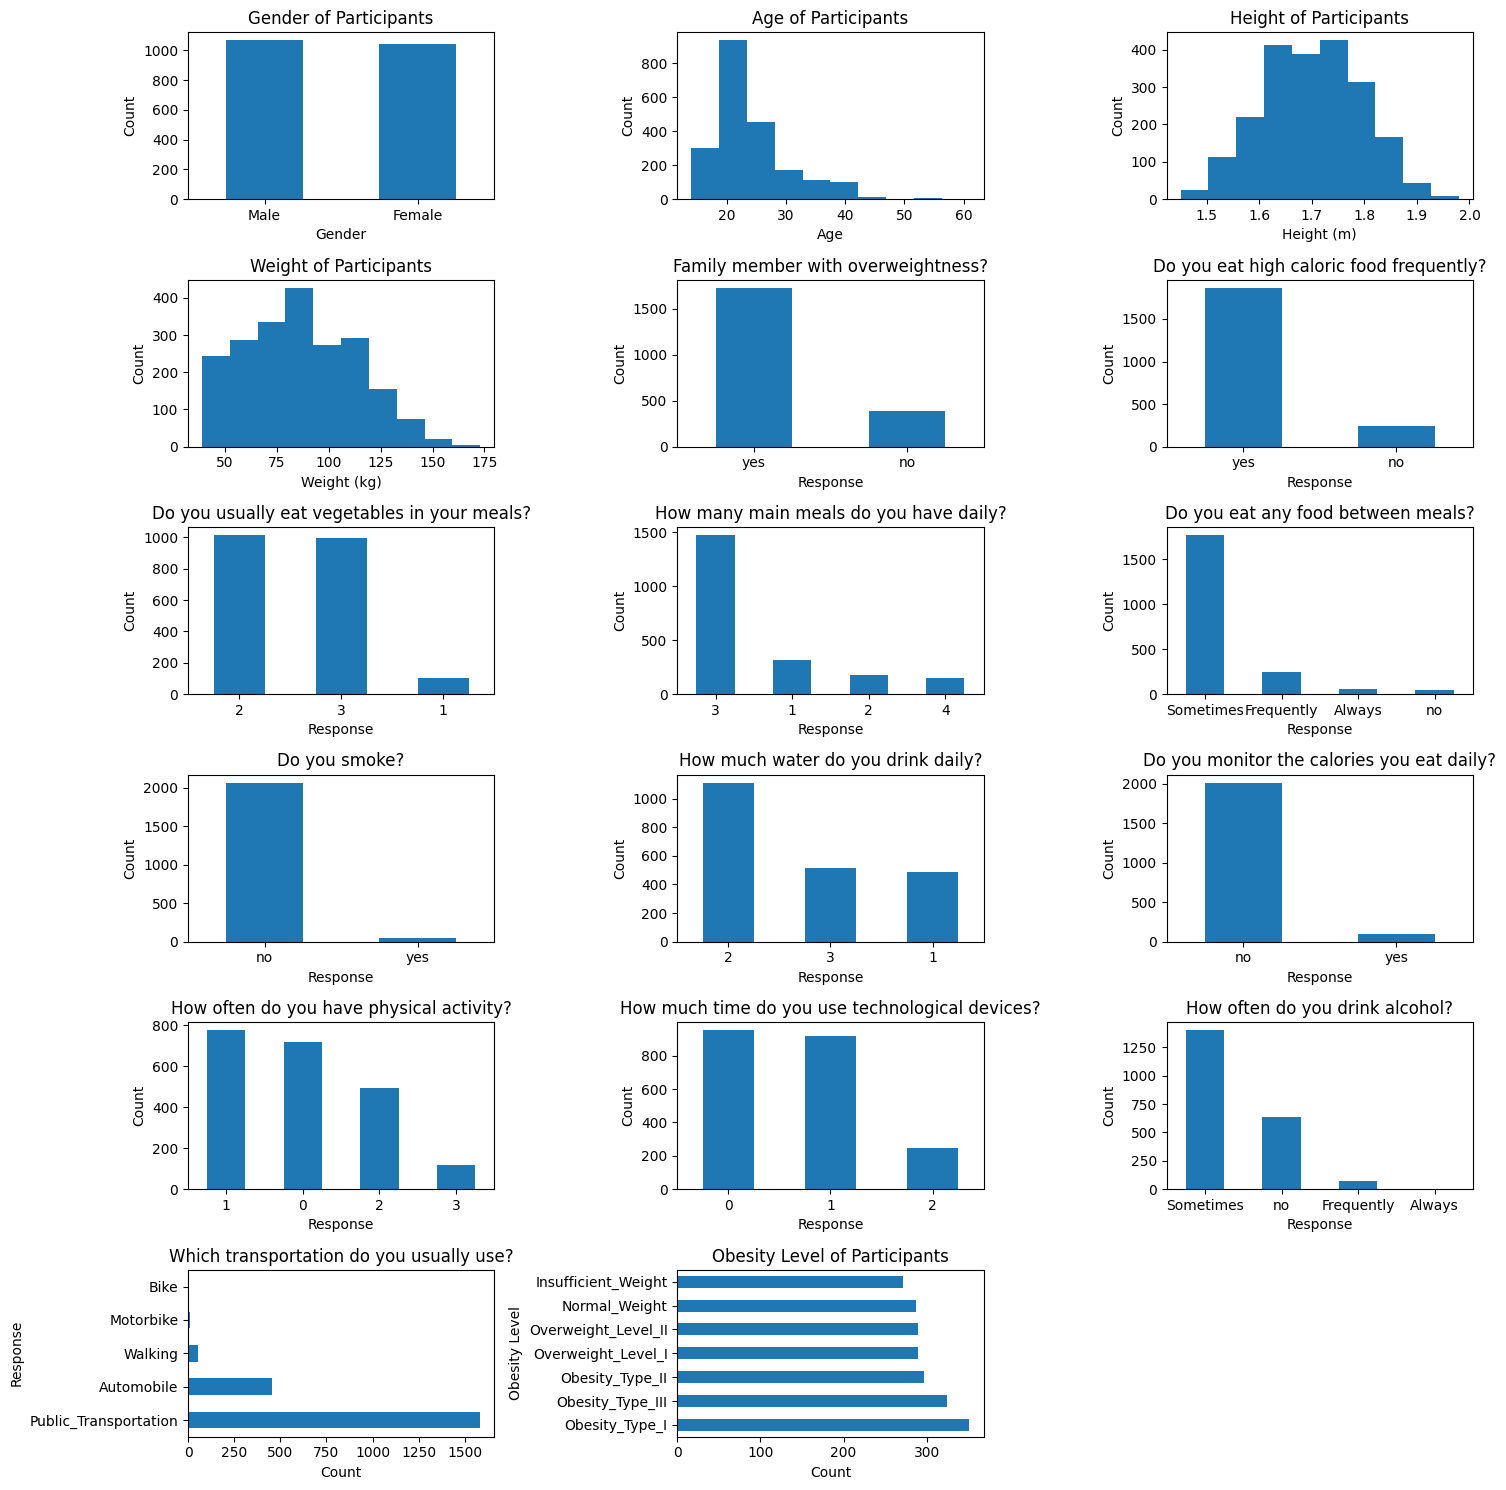

In [127]:
import matplotlib.pyplot as plt

plots_info = [
    ('Gender', 'bar', 'Gender', 'Count', 'Gender of Participants'),
    ('Age', 'hist', 'Age', 'Count', 'Age of Participants'),
    ('Height', 'hist', 'Height (m)', 'Count', 'Height of Participants'),
    ('Weight', 'hist', 'Weight (kg)', 'Count', 'Weight of Participants'),
    ('family_history_with_overweight', 'bar', 'Response', 'Count', 'Family member with overweightness?'),
    ('FAVC', 'bar', 'Response', 'Count', 'Do you eat high caloric food frequently?'),
    ('FCVC', 'bar', 'Response', 'Count', 'Do you usually eat vegetables in your meals?'),
    ('NCP', 'bar', 'Response', 'Count', 'How many main meals do you have daily?'),
    ('CAEC', 'bar', 'Response', 'Count', 'Do you eat any food between meals?'),
    ('SMOKE', 'bar', 'Response', 'Count', 'Do you smoke?'),
    ('CH2O', 'bar', 'Response', 'Count', 'How much water do you drink daily?'),
    ('SCC', 'bar', 'Response', 'Count', 'Do you monitor the calories you eat daily?'),
    ('FAF', 'bar', 'Response', 'Count', 'How often do you have physical activity?'),
    ('TUE', 'bar', 'Response', 'Count', 'How much time do you use technological devices?'),
    ('CALC', 'bar', 'Response', 'Count', 'How often do you drink alcohol?'),
    ('MTRANS', 'barh', 'Count', 'Response', 'Which transportation do you usually use?'),
    ('NObeyesdad', 'barh', 'Count', 'Obesity Level', 'Obesity Level of Participants')
]

def create_plots(df, plots_info, rows, cols, figsize):
    assert len(plots_info) <= rows * cols
    plt.figure(figsize=figsize)
    for i, info in enumerate(plots_info):
        feature, plt_type, xlabel, ylabel, title = info
        plt.subplot(rows, cols, i+1)
        if plt_type == 'bar':
            df[feature].value_counts().plot(kind='bar', rot=0)
        elif plt_type == 'barh':
            df[feature].value_counts().plot(kind='barh')
        elif plt_type == 'hist':
            df[feature].hist(grid=False)
        else:
            raise ValueError('Plot type must be either "bar", "barh", or "hist"')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
    plt.tight_layout()
    plt.show()

create_plots(data, plots_info, 6, 3, (15,15))

Based on the histograms for the numerical features Age, Height, and Weight, there do not seem to be any significant outliers in the data for these features.

### Correlation

#### Numerical Features

In [128]:
numerical_features = ['Age', 'Height', 'Weight']
numerical_features.extend(float_features)

data[numerical_features].corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.026184,0.203452,0.005941,-0.043440,-0.024554,-0.133161,-0.286071
Height,-0.026184,1.000000,0.463136,-0.053772,0.244055,0.180895,0.290594,0.058097
Weight,0.203452,0.463136,1.000000,0.178952,0.103273,0.186316,-0.047948,-0.039376
FCVC,0.005941,-0.053772,0.178952,1.000000,0.011111,0.061140,0.013661,-0.077269
NCP,-0.043440,0.244055,0.103273,0.011111,1.000000,0.063477,0.130322,0.013010
CH2O,-0.024554,0.180895,0.186316,0.061140,0.063477,1.000000,0.118205,-0.029207
FAF,-0.133161,0.290594,-0.047948,0.013661,0.130322,0.118205,1.000000,0.055513
TUE,-0.286071,0.058097,-0.039376,-0.077269,0.013010,-0.029207,0.055513,1.000000


None of the numerical features are highly correlated with each other. The highest correlation is 0.463 between Height and Weight. It is expected that these two features would have some correlation, however, the correlation in this dataset is not high.

#### Categorical Features

For categorical features, the Cramér's V measure can be used to find the association between two features.

In [129]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2 / n / k)

categorical_features = [c for c in data.columns if c not in numerical_features]
results = pd.DataFrame(index=categorical_features, columns=categorical_features)
for f1 in categorical_features:
    for f2 in categorical_features:
        results.loc[f1, f2] = round(cramers_v(data[f1], data[f2]), 3)

results

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
Gender,0.999,0.101,0.063,0.136,0.041,0.1,0.05,0.168,0.558
family_history_with_overweight,0.101,0.998,0.206,0.351,0.013,0.182,0.04,0.126,0.543
FAVC,0.063,0.206,0.998,0.197,0.045,0.187,0.142,0.205,0.332
CAEC,0.136,0.351,0.197,1.0,0.059,0.164,0.105,0.105,0.356
SMOKE,0.041,0.013,0.045,0.059,0.988,0.04,0.11,0.043,0.123
SCC,0.1,0.182,0.187,0.164,0.04,0.995,0.067,0.082,0.241
CALC,0.05,0.04,0.142,0.105,0.11,0.067,1.0,0.105,0.231
MTRANS,0.168,0.126,0.205,0.105,0.043,0.082,0.105,1.0,0.186
NObeyesdad,0.558,0.543,0.332,0.356,0.123,0.241,0.231,0.186,1.0


There is moderate association between NObeyesdad and Gender and between NObeyesdad and family_history_with_overweight. However, since there is no redundancy and since NObeyesdad is the target variable that will not be included in the model training, there is no reason to drop any of these features from the dataset.

### Data Transformation

For the model building and training, it is necessary to transform the categorical features to numerical features.

#### Binary Features

The features Gender, family_history_with_overweight, FAVC, SMOKE, and SCC need to be converted to binary features with values that are either 0 or 1.

In [130]:
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

data['Gender'] = (data['Gender'] == 'Male').astype(int)

for feat in binary_features[1:]:
    data[feat] = (data[feat] == 'yes').astype(int)
    
data[binary_features].head()

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC
0,0,1,0,0,0
1,0,1,0,1,1
2,1,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


#### Ordinal Features

The features CAEC and CALC are ordinal features that need to be represented as integers.

In [131]:
print(data['CAEC'].unique())
print(data['CALC'].unique())

['Sometimes' 'Frequently' 'Always' 'no']
['no' 'Sometimes' 'Frequently' 'Always']


In [132]:
mapping = { 'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3 }
data['CAEC'] = [mapping[val] for val in data['CAEC']]
data['CALC'] = [mapping[val] for val in data['CALC']]

data[['CAEC', 'CALC']].head()

,CAEC,CALC
0,1,0
1,1,1
2,1,2
3,1,2
4,1,1


#### One-Hot Encoding

The feature MTRANS is neither binary nor ordinal. Therefore, one-hot encoding is the best option to represent the feature numerically.

In [133]:
from sklearn.preprocessing import OneHotEncoder

print(data.shape)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[['MTRANS']])
encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out()).round(0).astype(int)
data = data.join(encoded_data).drop('MTRANS', axis=1)

print(data.shape)

(2111, 17)
(2111, 20)


In [136]:
X = data.drop(columns='NObeyesdad')
y = data['NObeyesdad']

The final transformed data that will be used to train the models:

In [138]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,0,0,1,0
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,0,0,1,0
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,0,0,1,0
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,0,0,0,1
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,0,0,1,0


## Model Building

### Choice of Models

The unsupervised approaches that will be considered are:
- Agglomerative Clustering
- K-Means Clustering
- Non-Negative Matrix Factorization (NMF)

### Model Fitting and Hyperparameter Tuning

#### Agglomerative Clustering

For agglomerative clustering, the hyperparameters that will be considered are the linkage criterion and the distance metric.

In [172]:
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import AgglomerativeClustering


def get_best_accuracy(y_true, y_pred):
    permutations = itertools.permutations(y_true.unique())
    best_permutation = None
    best_accuracy = 0.0
    
    for p in permutations:
        yp_new = [p[i] for i in y_pred]
        accuracy = accuracy_score(y_true, yp_new)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = p
    
    return (best_permutation, best_accuracy)


n_clusters = 7

param_grid = [
    {
        'linkage': ['ward'],
        'metric': ['euclidean']
    },
    {
        'linkage': ['complete', 'average', 'single'],
        'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
    }
]

best_model = None
best_params = None
best_labels = None
best_acc = 0.0

for d in param_grid:
    for linkage in d['linkage']:
        for metric in d['metric']:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage).fit(X)
            labels, acc = get_best_accuracy(y, model.labels_)
            if acc > best_acc:
                best_model = model
                best_params = (linkage, metric)
                best_labels = labels
                best_acc = acc

In [173]:
print('Best linkage method:', best_params[0])
print('Best distance metric:', best_params[1])
print('Best model accuracy:', best_acc)
y_pred = [best_labels[l] for l in best_model.labels_]
print('Best model confusion matrix:')
print(confusion_matrix(y, y_pred))

Best linkage method: ward
Best distance metric: euclidean
Best model accuracy: 0.5040265277119849
Best model confusion matrix:
[[269   3   0   0   0   0   0]
 [154  87   0   0   0   9  37]
 [  0   0 142  24   1  55 129]
 [  0   0  87 209   1   0   0]
 [  0   0  81 105 138   0   0]
 [ 27  88   0   0   0  34 141]
 [  3  25  24   0   0  53 185]]


The "ward" linkage method and the "cosine" distance metric give the best accuracy for the agglomerative clustering model.

#### K-Means Clustering

For K-means clustering, the hyperparameters that will be considered are the initialization method and the algorithm.

In [179]:
from sklearn.cluster import KMeans

param_grid = {
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

best_model = None
best_params = None
best_labels = None
best_acc = 0.0

for init in param_grid['init']:
    for algorithm in param_grid['algorithm']:
        model = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=123).fit(X)
        labels, acc = get_best_accuracy(y, model.labels_)
        if acc > best_acc:
            best_model = model
            best_params = (init, algorithm)
            best_labels = labels
            best_acc = acc

In [180]:
print('Best initialization method:', best_params[0])
print('Best algorithm:', best_params[1])
print('Best model accuracy:', best_acc)
y_pred = [best_labels[l] for l in best_model.labels_]
print('Best model confusion matrix:')
print(confusion_matrix(y, y_pred))

Best initialization method: k-means++
Best algorithm: lloyd
Best model accuracy: 0.5267645665561346
Best model confusion matrix:
[[232  40   0   0   0   0   0]
 [ 93 156   0   0   0  31   7]
 [  0   0 145  21   0 118  67]
 [  0   0  59 222  16   0   0]
 [  0   0  81 108 135   0   0]
 [  7 117   0   0   0 140  26]
 [  0  39  29   0   0 140  82]]


The "k-means++" initialization method and the "Lloyd" algorithm give the best accuracy for the k-means clustering model.

#### Non-Negative Matrix Factorization (NMF)

For NMF, the hyperparameters that will be considered are the solver and the loss function.

In [192]:
from sklearn.decomposition import NMF

param_grid = [
    {
        'solver': 'cd',
        'beta_loss': ['frobenius']
    },
    {
        'solver': 'mu',
        'beta_loss': ['frobenius', 'kullback-leibler']
    }
]

best_model = None
best_params = None
best_labels = None
best_acc = 0.0

for d in param_grid:
    solver = d['solver']
    for beta_loss in d['beta_loss']:
        model = NMF(n_components=n_clusters, solver=solver, beta_loss=beta_loss, max_iter=100000, random_state=123)
        W = model.fit_transform(X)
        y_pred = np.argmax(W, axis=1)
        labels, acc = get_best_accuracy(y, y_pred)
        if acc > best_acc:
            best_model = model
            best_params = (solver, beta_loss)
            best_labels = labels
            best_acc = acc

In [193]:
print('Best solver:', best_params[0])
print('Best beta loss:', best_params[1])
print('Best model accuracy:', best_acc)
W = best_model.transform(X)
y_pred = [best_labels[i] for i in np.argmax(W, axis=1)]
print('Best model confusion matrix:')
print(confusion_matrix(y, y_pred))

Best solver: mu
Best beta loss: frobenius
Best model accuracy: 0.3169114163903363
Best model confusion matrix:
[[196  12   0   0   0  64   0]
 [178  18   0   4  22  51  14]
 [ 35   7   3 105  77  12 112]
 [  0   5   0 111  61   0 120]
 [  0   0  29 152 143   0   0]
 [ 99  37   5  31  32  30  56]
 [ 84  13   5  60  31  16  81]]


The "mu" solver and the "Frobenius" beta loss give the best accuracy for the NMF model.

## Results

The following table summarizes the best accuracies achieved for each type of model:

| Model | Best Accuracy |
|:--:|:--:|
| Agglomerative Clustering | 0.504 |
| K-Means Clustering | 0.527 |
| Non-Negative Matrix Factorization | 0.317 |

The best accuracy was achieved using the K-means clustering approach with the initialization method set to "k-means++" and the algorithm set to "Lloyd".

## Discussion/Conclusion

From conducting the cluster analysis on this dataset, it was observed that it is difficult to group participant information and responses into varying obesity levels. The K-means clustering approach was able to achieve the best accuracy of 0.527. Through clustering, approximately half of the data can be correctly labelled.

A limitation of building a model using this dataset is the presence of many categorical features. If the dataset included exclusively numerical features, it is likely that clustering models that can achieve higher accuracies could be trained.

The best accuracy achieved could possibly be improved by utilizing methods different to those used in this project to deal with the categorical features in the dataset. Additionally, considering other hyperparameters or different ranges of values for the hyperparameters could also improve the accuracies of the models.